In [1]:
import numpy as np
import pandas as pd
import math
import re
import inspect
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

#CSV読み込み
df = pd.read_csv('../output/items_spots.csv')
# 重複行を削除
# df = df.drop_duplicates()

In [2]:
df.head(10)

,_type,budget_dinner,budget_lunch,genre,name,reviewCount,score,score_dinner,score_lunch
0,dict,"￥3,000～￥3,999",null,和食（その他）、居酒屋、しゃぶしゃぶ,\n 霧乃個室 清郎 品川\n,20,3.06,3.06,-
1,dict,"￥5,000～￥5,999",～￥999,居酒屋、魚介料理・海鮮料理、鍋（その他）,\n ときしらず 品川店\n,13,3.06,3.06,3.05
2,dict,"￥10,000～￥14,999","￥8,000～￥9,999",寿司、懐石・会席料理、すき焼き,\n 個室割烹 寿司北大路 品川店\n,19,3.18,3.18,-
3,dict,"￥5,000～￥5,999","￥1,000～￥1,999",ダイニングバー、カリフォルニア料理、ハンバーガー,\n ウルフギャング・パック PIZZA BAR アレア品川...,38,3.15,3.11,3.09
4,dict,"￥3,000～￥3,999",null,居酒屋、もつ鍋、郷土料理（その他）,\n 九州黒太鼓 品川\n,7,3.06,3.06,3.00
5,dict,"￥4,000～￥4,999",null,居酒屋、鳥料理、もつ鍋,\n 隠れ家個室居酒屋 鶏の久兵衛 品川本店\n ...,39,3.43,3.43,-
6,dict,"￥4,000～￥4,999","￥1,000～￥1,999",居酒屋、魚介料理・海鮮料理、そば,\n 土風炉 夢町小路 品川店\n,61,3.01,3.01,3.01
7,dict,"￥5,000～￥5,999","￥1,000～￥1,999",居酒屋、魚介料理・海鮮料理、創作料理,\n 美食 米門 品川店\n,113,3.52,3.51,3.25
8,dict,"￥2,000～￥2,999",～￥999,居酒屋、魚介料理・海鮮料理、餃子,\n 居酒屋 三平\n,29,3.02,3.03,3.01
9,dict,"￥3,000～￥3,999","￥3,000～￥3,999",居酒屋、中国鍋・火鍋、鍋（その他）,\n 品川ろくよん\n,19,3.04,3.05,-


In [3]:
#列の順序を入れ替え
df = df.loc[:,['name','genre','score','score_lunch','score_dinner','reviewCount','budget_lunch','budget_dinner']]
#改行コードを削除
df = df.replace( '\n', '', regex=True)
df.head(10)

,name,genre,score,score_lunch,score_dinner,reviewCount,budget_lunch,budget_dinner
0,霧乃個室 清郎 品川,和食（その他）、居酒屋、しゃぶしゃぶ,3.06,-,3.06,20,null,"￥3,000～￥3,999"
1,ときしらず 品川店,居酒屋、魚介料理・海鮮料理、鍋（その他）,3.06,3.05,3.06,13,～￥999,"￥5,000～￥5,999"
2,個室割烹 寿司北大路 品川店,寿司、懐石・会席料理、すき焼き,3.18,-,3.18,19,"￥8,000～￥9,999","￥10,000～￥14,999"
3,ウルフギャング・パック PIZZA BAR アレア品川店 ...,ダイニングバー、カリフォルニア料理、ハンバーガー,3.15,3.09,3.11,38,"￥1,000～￥1,999","￥5,000～￥5,999"
4,九州黒太鼓 品川,居酒屋、もつ鍋、郷土料理（その他）,3.06,3.00,3.06,7,null,"￥3,000～￥3,999"
5,隠れ家個室居酒屋 鶏の久兵衛 品川本店,居酒屋、鳥料理、もつ鍋,3.43,-,3.43,39,null,"￥4,000～￥4,999"
6,土風炉 夢町小路 品川店,居酒屋、魚介料理・海鮮料理、そば,3.01,3.01,3.01,61,"￥1,000～￥1,999","￥4,000～￥4,999"
7,美食 米門 品川店,居酒屋、魚介料理・海鮮料理、創作料理,3.52,3.25,3.51,113,"￥1,000～￥1,999","￥5,000～￥5,999"
8,居酒屋 三平,居酒屋、魚介料理・海鮮料理、餃子,3.02,3.01,3.03,29,～￥999,"￥2,000～￥2,999"
9,品川ろくよん,居酒屋、中国鍋・火鍋、鍋（その他）,3.04,-,3.05,19,"￥3,000～￥3,999","￥3,000～￥3,999"


In [4]:
# ジャンルを分ける
df_genre = pd.DataFrame(df.genre.str.split('、').tolist(), index=list(df.index)).stack()
df_genre = df_genre.reset_index()
df_genre = df_genre.rename(columns={'level_0': 'key_index', 'level_1': 'genre_index', 0: 'genre_sep'})
df_genre.head(10)

,key_index,genre_index,genre_sep
0,0,0,和食（その他）
1,0,1,居酒屋
2,0,2,しゃぶしゃぶ
3,1,0,居酒屋
4,1,1,魚介料理・海鮮料理
5,1,2,鍋（その他）
6,2,0,寿司
7,2,1,懐石・会席料理
8,2,2,すき焼き
9,3,0,ダイニングバー


In [5]:
# df をジャンルごとに別行に分ける
df_sepGenre = pd.merge(df, df_genre, left_index=True, right_on='key_index', how='left')
df_sepGenre = df_sepGenre.drop(['key_index','genre'],axis=1)
df_sepGenre = df_sepGenre.rename(columns={'genre_sep': 'genre'})
df_sepGenre.head(10)

,name,score,score_lunch,score_dinner,reviewCount,budget_lunch,budget_dinner,genre_index,genre
0,霧乃個室 清郎 品川,3.06,-,3.06,20,null,"￥3,000～￥3,999",0,和食（その他）
1,霧乃個室 清郎 品川,3.06,-,3.06,20,null,"￥3,000～￥3,999",1,居酒屋
2,霧乃個室 清郎 品川,3.06,-,3.06,20,null,"￥3,000～￥3,999",2,しゃぶしゃぶ
3,ときしらず 品川店,3.06,3.05,3.06,13,～￥999,"￥5,000～￥5,999",0,居酒屋
4,ときしらず 品川店,3.06,3.05,3.06,13,～￥999,"￥5,000～￥5,999",1,魚介料理・海鮮料理
5,ときしらず 品川店,3.06,3.05,3.06,13,～￥999,"￥5,000～￥5,999",2,鍋（その他）
6,個室割烹 寿司北大路 品川店,3.18,-,3.18,19,"￥8,000～￥9,999","￥10,000～￥14,999",0,寿司
7,個室割烹 寿司北大路 品川店,3.18,-,3.18,19,"￥8,000～￥9,999","￥10,000～￥14,999",1,懐石・会席料理
8,個室割烹 寿司北大路 品川店,3.18,-,3.18,19,"￥8,000～￥9,999","￥10,000～￥14,999",2,すき焼き
9,ウルフギャング・パック PIZZA BAR アレア品川店 ...,3.15,3.09,3.11,38,"￥1,000～￥1,999","￥5,000～￥5,999",0,ダイニングバー


居酒屋          189
魚介料理・海鮮料理     63
カフェ           55
その他           54
イタリアン         49
定食・食堂         43
ダイニングバー       40
焼鳥            32
ラーメン          29
和食（その他）       25
弁当            24
寿司            24
焼肉            24
バル・バール        23
中華料理          23
ケーキ           22
バー            22
うどん           20
餃子            19
パン            19
サンドイッチ        18
もつ鍋           18
割烹・小料理        17
カレーライス        17
そば            16
創作料理          16
鳥料理           15
鍋（その他）        15
しゃぶしゃぶ        15
懐石・会席料理       14
Name: genre, dtype: int64

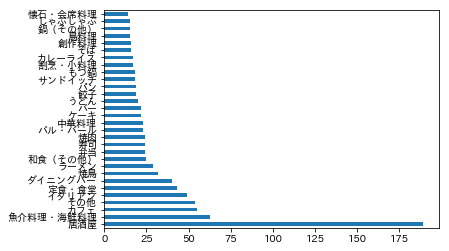

In [6]:
# どのジャンルが多いか
genre_count_top30 = df_sepGenre['genre'].value_counts().head(30)
genre_count_top30.plot.barh()
genre_count_top30

居酒屋          117
カフェ           51
イタリアン         43
定食・食堂         41
魚介料理・海鮮料理     38
その他           36
ダイニングバー       31
ラーメン          28
ケーキ           22
弁当            22
中華料理          22
うどん           20
焼肉            20
パン            19
サンドイッチ        18
焼鳥            18
和食（その他）       18
餃子            16
バル・バール        16
そば            16
カレーライス        16
寿司            15
洋食            14
洋菓子（その他）      14
和菓子           13
懐石・会席料理       12
つけ麺           12
もつ鍋           11
ステーキ          11
割烹・小料理        11
Name: genre, dtype: int64

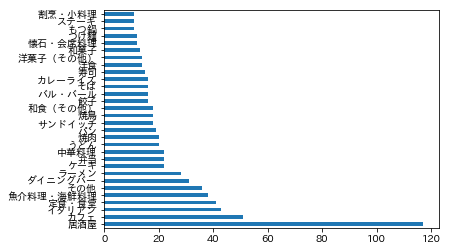

In [7]:
# ランチのみ
df_sepGenre_lunchOnly = df_sepGenre[df_sepGenre.budget_lunch != 'null']
lunch_genre_count_top30 = df_sepGenre_lunchOnly['genre'].value_counts().head(30)
lunch_genre_count_top30.plot.barh()
lunch_genre_count_top30

### 結果
料理のジャンルとしては、多い順に
1. イタリアン 43
2. 魚介料理・海鮮料理　38
3. ラーメン　28
4. 中華料理　22
5. 焼肉　20
   うどん　20

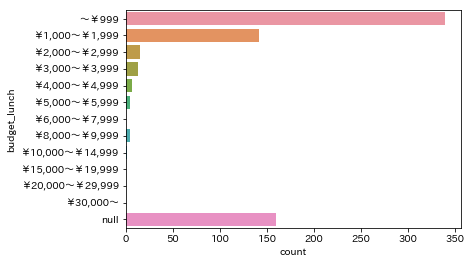

In [8]:
# ランチの価格帯を調べる
order_budget = [' ～￥999',
                '￥1,000～￥1,999',
                '￥2,000～￥2,999',
                '￥3,000～￥3,999',
                '￥4,000～￥4,999',   
                '￥5,000～￥5,999',
                '￥6,000～￥7,999',
                '￥8,000～￥9,999',
                '￥10,000～￥14,999',
                '￥15,000～￥19,999',
                '￥20,000～￥29,999',
                '￥30,000～',
                'null']
sns.countplot(y='budget_lunch', data=df, order=order_budget)

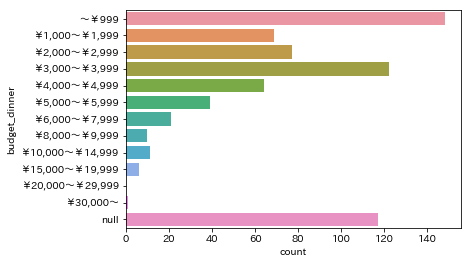

In [9]:
# ディナーの価格帯を調べる
sns.countplot(y='budget_dinner', data=df, order=order_budget)

In [10]:
# 999円以下はチェーン店やコンビニが多い
df[df.budget_dinner == ' ～￥999'].head(10)

,name,genre,score,score_lunch,score_dinner,reviewCount,budget_lunch,budget_dinner
143,野郎ラーメン 品達品川本店,ラーメン、つけ麺,3.08,3.07,3.08,29,～￥999,～￥999
149,パティスリーQBG エキュート品川店,ケーキ、洋菓子（その他）,3.46,3.40,3.11,115,～￥999,～￥999
150,ファミリーマート 品川グランパサージュ店 ...,その他,3.00,-,3.00,1,null,～￥999
154,イーション エキュート品川サウス店,弁当、デリカテッセン、イタリアン,3.15,3.08,3.10,43,"￥1,000～￥1,999",～￥999
157,スターバックスコーヒー JR東海 品川駅店 ...,カフェ,3.00,3.00,-,7,～￥999,～￥999
160,幸丼 東京品川,丼もの（その他）、カレーライス、ラーメン,3.57,3.55,3.50,98,～￥999,～￥999
161,御門屋 品川駅店,和菓子,3.08,3.09,3.06,30,"￥1,000～￥1,999",～￥999
164,ベジテリア エキュート品川サウス店,ジュースバー、スープ、パン・サンドイッチ（その他）,3.09,3.08,3.08,30,～￥999,～￥999
165,カフェラット ニジュウゴド 品川駅店,カフェ、自然食、サンドイッチ,3.07,3.07,3.03,44,～￥999,～￥999
168,パオパオ エキュート品川店,肉まん・中華まん,3.08,3.07,3.08,21,～￥999,～￥999
